1.Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

2.Dataset Loading

In [2]:
df=pd.read_csv('/content/drive/MyDrive/practice datas/star_classification.csv',nrows=10000)
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237664e+18,15.509302,1.032834,23.76142,21.60551,20.18169,18.82800,17.97066,4263,301,6,219,1.218316e+18,STAR,0.000021,1082,52523,336
9996,1.237671e+18,144.256278,15.502495,25.28108,23.24951,22.21676,21.77299,21.70472,5935,301,4,186,1.079202e+19,GALAXY,0.461456,9585,57780,990
9997,1.237659e+18,242.904825,37.654705,19.30690,17.86614,17.28298,17.05059,16.93477,3185,301,4,15,3.903502e+18,STAR,-0.000026,3467,54999,26
9998,1.237680e+18,346.981746,25.819909,22.98510,22.00351,21.82306,21.84666,21.60912,8110,301,2,151,7.095496e+18,STAR,-0.001457,6302,56565,270


3.Exploratory Data Analysis

In [3]:
df.isna().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [4]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [5]:
df.shape

(10000, 18)

In [6]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       10000 non-null  float64
 1   alpha        10000 non-null  float64
 2   delta        10000 non-null  float64
 3   u            10000 non-null  float64
 4   g            10000 non-null  float64
 5   r            10000 non-null  float64
 6   i            10000 non-null  float64
 7   z            10000 non-null  float64
 8   run_ID       10000 non-null  int64  
 9   rerun_ID     10000 non-null  int64  
 10  cam_col      10000 non-null  int64  
 11  field_ID     10000 non-null  int64  
 12  spec_obj_ID  10000 non-null  float64
 13  class        10000 non-null  object 
 14  redshift     10000 non-null  float64
 15  plate        10000 non-null  int64  
 16  MJD          10000 non-null  int64  
 17  fiber_ID     10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usag

4.Data Visualization

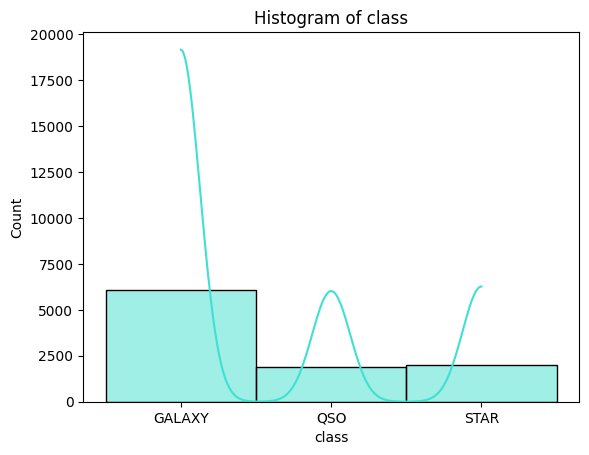

In [8]:
x=df['class']
sns.histplot(x,color='turquoise',bins=20,kde=True)
plt.title('Histogram of class')
plt.show()

<Axes: title={'center': 'Countplot'}, xlabel='class', ylabel='count'>

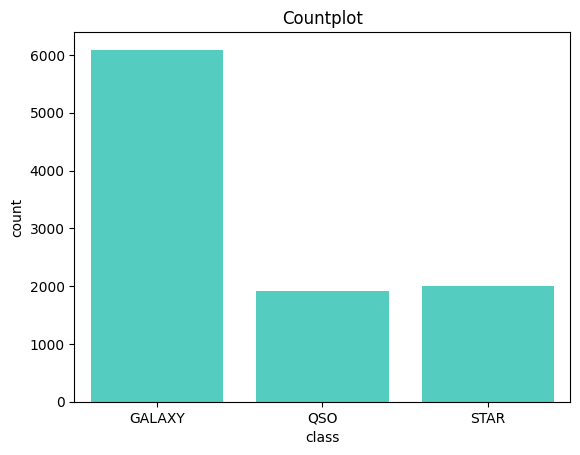

In [9]:
plt.title('Countplot')
sns.countplot(x='class',color='turquoise',data=df)

Text(0.5, 1.0, 'Percentage of Class')

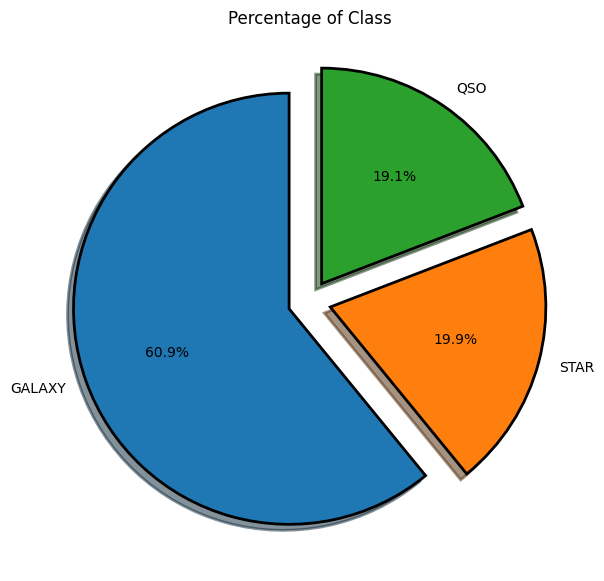

In [10]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue')
wp = {'linewidth':2, "edgecolor":'black'}
tags = df['class'].value_counts()
explode=(0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True,startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Percentage of Class')

<Axes: title={'center': 'Barplot'}, xlabel='class', ylabel='delta'>

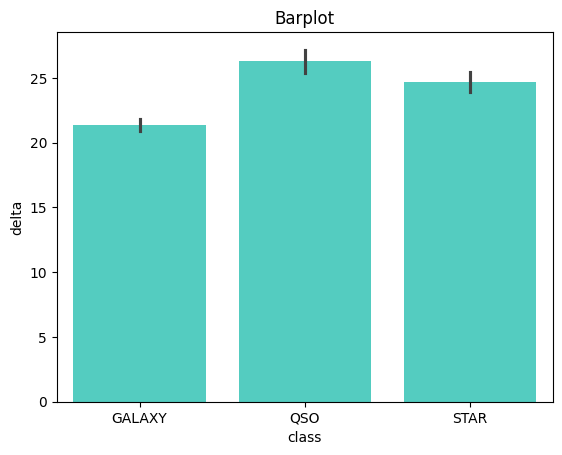

In [11]:
plt.title('Barplot')
sns.barplot(x='class',y='delta',color='turquoise',data=df)

<Axes: title={'center': 'Violinplot'}, xlabel='delta', ylabel='class'>

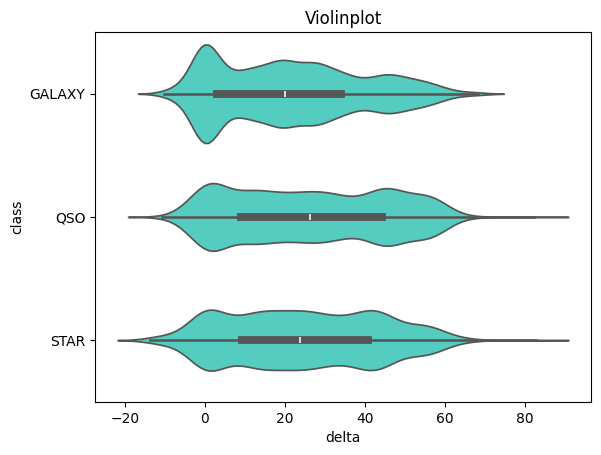

In [12]:
plt.title('Violinplot')
sns.violinplot(x='delta',y='class',color='turquoise',data=df)

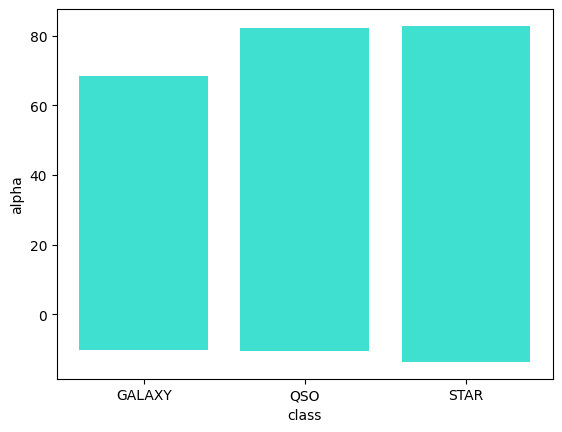

In [13]:
x=df['class']
y=df['delta']
plt.bar(x,y,color='turquoise')
plt.xlabel("class")
plt.ylabel("alpha")
plt.show()

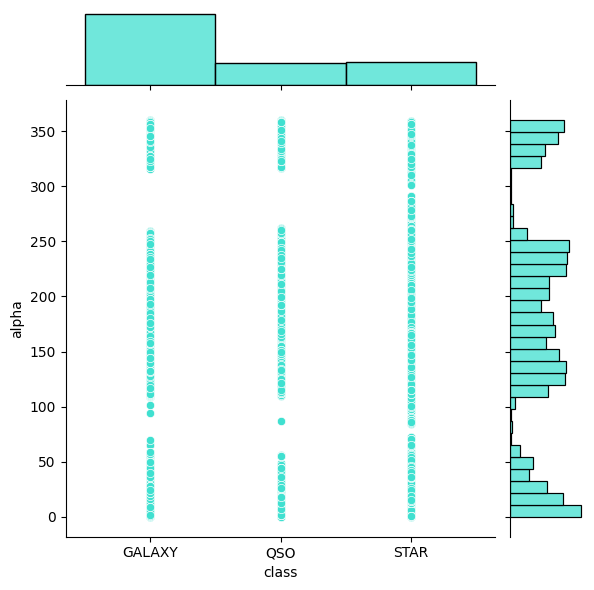

In [14]:
sns.jointplot(x='class',y='alpha',color='turquoise',data=df)

In [15]:
df['class'] = pd.factorize(df['class'])[0]

5.Data Preprocessing

a.Feature Selection

In [16]:
corr=df.corr()
corr["class"].sort_values()

u             -0.232967
g             -0.176932
field_ID      -0.119216
obj_ID        -0.024805
run_ID        -0.024803
r             -0.020290
cam_col       -0.016670
redshift      -0.015148
fiber_ID      -0.013422
alpha          0.015758
spec_obj_ID    0.045557
plate          0.045558
MJD            0.062066
i              0.071633
delta          0.087779
z              0.123548
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

After analyzing the correlation of each feature with the label, we can eliminate those features that have a low correlation and are also insignificant for the objective of the problem, such as the object ID, which does not contribute anything to us.

In [17]:
df.drop(['obj_ID','run_ID','rerun_ID','field_ID','fiber_ID','spec_obj_ID'], axis=1, inplace=True)

In [18]:
X= df.drop('class', axis=1)
y= df['class']

b.Handling imbalanced dataset using
Under Sampling

In [19]:
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler()
X,y=us.fit_resample(X,y)
y.value_counts()

0    1915
1    1915
2    1915
Name: class, dtype: int64

c.Scaling & Train_Test_Split

In [20]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

6.Data Modeling & Perfomance measure

KNeighbor Classifier

____________________ KNEIGHBORS CLASSIFIER ____________________
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       581
           1       0.95      0.91      0.93       574
           2       0.92      0.80      0.86       569

    accuracy                           0.88      1724
   macro avg       0.89      0.88      0.88      1724
weighted avg       0.89      0.88      0.88      1724

____________________ Confusion Matrix Display ____________________


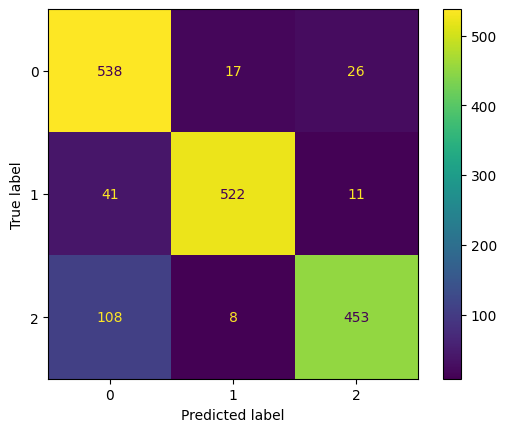

In [21]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('_'*20,'KNEIGHBORS CLASSIFIER','_'*20)
print(classification_report(y_test,y_pred))
print('_'*20,'Confusion Matrix Display','_'*20)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Support Vector Classifier

____________________ SUPPORT VECTOR CLASSIFIER ____________________
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       581
           1       0.98      0.94      0.96       574
           2       0.92      0.95      0.94       569

    accuracy                           0.93      1724
   macro avg       0.93      0.93      0.93      1724
weighted avg       0.93      0.93      0.93      1724

____________________ Confusion Matrix Display ____________________


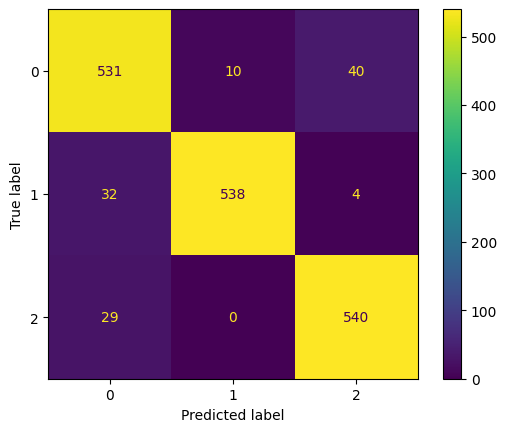

In [22]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('_'*20,'SUPPORT VECTOR CLASSIFIER','_'*20)
print(classification_report(y_test,y_pred))
print('_'*20,'Confusion Matrix Display','_'*20)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Decision Tree Classifier

____________________ DECISION TREE CLASSIFIER ____________________
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       581
           1       0.93      0.95      0.94       574
           2       0.99      1.00      1.00       569

    accuracy                           0.96      1724
   macro avg       0.96      0.96      0.96      1724
weighted avg       0.96      0.96      0.96      1724

____________________ Confusion Matrix Display ____________________


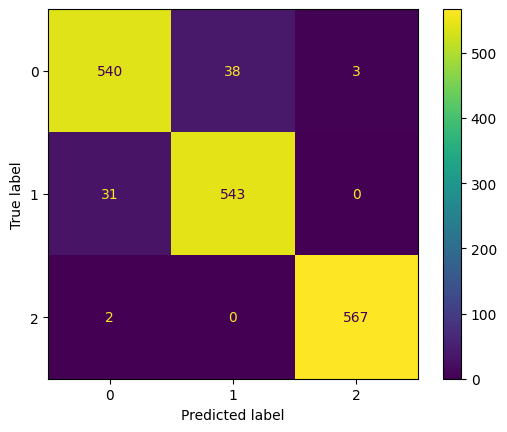

In [23]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('_'*20,'DECISION TREE CLASSIFIER','_'*20)
print(classification_report(y_test,y_pred))
print('_'*20,'Confusion Matrix Display','_'*20)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Here, decision tree classifier have the highest accuracy.so let use decision tree classifier in Streamlit

7.Streamlit

In [24]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00


In [25]:
!wget -q -O - - ipv4.icanhazip.com

34.74.78.197


In [26]:
%%writefile app.py

Writing app.py


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session 3e619b65016c491

npx: installed 22 in 7.733s
your url is: https://all-owls-fetch.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.74.78.197:8501

2024-01-17 05:36:49.483 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 535, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 21, in <module>
    Y_pred=svc.predict(X_test)
NameError: name 'svc' is not defined


import streamlit as st
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df=pd.read_csv('/content/drive/MyDrive/practice datas/star_classification.csv',nrows=10000)
df.drop(['obj_ID','run_ID','rerun_ID','field_ID','fiber_ID','spec_obj_ID'], axis=1, inplace=True)
X= df.drop('class', axis=1)
y= df['class']

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=1)

# Create a dt
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
Y_pred=dt.predict(X_test)

st.title("Star Prediction")

alpha=st.slider('alpha',min_value=0,max_value=350,value=135)

delta=st.slider('delta',min_value=-13,max_value=100,value=32)

u=st.slider('u',min_value=10,max_value=30,value=23)

g=st.slider('g',min_value=10,max_value=30,value=22)

r=st.slider('r',min_value=10,max_value=30,value=20)

i=st.slider('i',min_value=10,max_value=30,value=19)

z=st.slider('z',min_value=10,max_value=30,value=18)

cam_col=st.slider('cam_col',min_value=0,max_value=10,value=2)

redshift=st.slider('redshift',min_value=-1,max_value=10,value=0)

plate=st.slider('plate',min_value=1000,max_value=11000,value=10445)

MJD=st.slider('MJD',min_value=50000,max_value=60000,value=58158)

Y_pred=dt.predict([[alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD]])

if st.button('submit'):

  if Y_pred[0]==0:
    st.write('QUASI_STELLAR')
  elif Y_pred[0]==1:
    st.write('STAR')
  else:
    st.write('GALAXY')
